<a href="https://colab.research.google.com/github/rahul-suthar2001/Machine-Learning/blob/main/Deep%20Learning/Customer_churn/bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as  np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df1 = df.drop(['CustomerId','Surname','RowNumber'],axis=1)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df1.replace({'Female':1,'Male':0},inplace=True)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [9]:
df2 = pd.get_dummies(data=df1,columns=['Geography'])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [22]:
cols_to_scale = ['CreditScore','Age','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
df2.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,2,0.500246,1,1,1,0.395400,0,0,0,1


In [23]:
X= df2.drop(['Exited'],axis=1)
y = df2['Exited']


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
len(X_train.columns)

12

In [26]:


model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
     keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),

    
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7920
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4873 - accuracy: 0.7939
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.7949
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7995
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.8067
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.8106
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4265 - accuracy: 0.8126
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.8141
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4152 - accuracy: 0.8173
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4106 - accura

In [29]:
yp= model.predict(X_test)
yp

array([[0.0791864 ],
       [0.08055587],
       [0.01498589],
       ...,
       [0.813657  ],
       [0.23924772],
       [0.07764671]], dtype=float32)

In [30]:
y_pred = []
for ele in yp:
  if ele >0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [32]:
y_pred[:5]

[0, 0, 0, 0, 0]

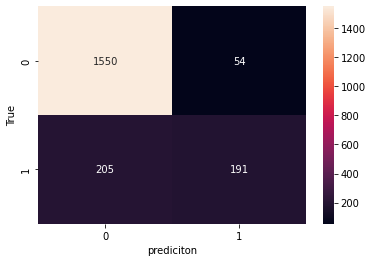

In [34]:
import seaborn  as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("prediciton")
plt.ylabel("True")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.78      0.48      0.60       396

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

